# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [5]:
import pandas as pd
import os
import zipfile

# Correct file path, make sure to use quotes around the path
file_path = '/content/archive.zip'  # Adjust this path to match the location of your file

# Check if the file exists
if os.path.exists(file_path):
    # If the file is a .zip, you may need to extract it before reading the contents
    if file_path.endswith('.zip'):
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Extract all contents to a folder
            zip_ref.extractall('/content/')
            print("Extracted the zip file.")

        # Now, check the contents of the zip file and choose the CSV or other relevant file
        extracted_files = os.listdir('/content/')
        print("Files extracted:", extracted_files)

        # If a CSV file is extracted, load it
        csv_file = [file for file in extracted_files if file.endswith('.csv')][0]  # Pick the first CSV file
        file_path = f'/content/{csv_file}'

    # Read the data from the CSV file (use read_excel for Excel files)
    try:
        # Attempt to read with a common encoding (ISO-8859-1 or latin1)
        data = pd.read_csv(file_path, encoding='ISO-8859-1')  # You can change encoding if necessary
    except UnicodeDecodeError:
        # In case there is still a decoding error, try another encoding
        print("Unicode decoding error, trying a different encoding...")
        data = pd.read_csv(file_path, encoding='utf-16')  # Try utf-16 or another encoding

    # Show the number of rows and columns
    num_rows, num_columns = data.shape
    print(f'The dataset has {num_rows} rows and {num_columns} columns.')

    # Display the first few rows of the dataset
    print("\nFirst 5 rows of the dataset:")
    print(data.head())  # Shows the first 5 rows, can change to .tail() for last 5 rows

else:
    print(f"Error: The file '{file_path}' does not exist. Please check the file path.")



Extracted the zip file.
Files extracted: ['.config', 'archive.zip', 'World CO2 Emission MetaData.csv', 'World CO2 Emission Data.csv', 'sample_data']
The dataset has 8292 rows and 67 columns.

First 5 rows of the dataset:
  Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name           Series Code  \
0  Adjusted savings: carbon dioxide damage (% of ...     NY.ADJ.DCO2.GN.ZS   
1  Adjusted savings: carbon dioxide damage (curre...        NY.ADJ.DCO2.CD   
2  Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
3  Agricultural nitrous oxide emissions (thousand...  EN.ATM.NOXE.AG.KT.CE   
4             CO2 emissions (kg per 2015 US$ of GDP)     EN.ATM.CO2E.KD.GD   

  1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963] 1964 [YR1964]  \
0            ..            ..            ..     

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [6]:
import pandas as pd
import os
import zipfile

# Correct file path, make sure to use quotes around the path
file_path = '/content/archive.zip'  # Adjust this path to match the location of your file

# Check if the file exists
if os.path.exists(file_path):
    # If the file is a .zip, you may need to extract it before reading the contents
    if file_path.endswith('.zip'):
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Extract all contents to a folder
            zip_ref.extractall('/content/')
            print("Extracted the zip file.")

        # Now, check the contents of the zip file and choose the CSV or other relevant file
        extracted_files = os.listdir('/content/')
        print("Files extracted:", extracted_files)

        # If a CSV file is extracted, load it
        csv_file = [file for file in extracted_files if file.endswith('.csv')][0]  # Pick the first CSV file
        file_path = f'/content/{csv_file}'

    # Read the data from the CSV file (use read_excel for Excel files)
    try:
        # Attempt to read with a common encoding (ISO-8859-1 or latin1)
        data = pd.read_csv(file_path, encoding='ISO-8859-1')  # You can change encoding if necessary
    except UnicodeDecodeError:
        # In case there is still a decoding error, try another encoding
        print("Unicode decoding error, trying a different encoding...")
        data = pd.read_csv(file_path, encoding='utf-16')  # Try utf-16 or another encoding

    # Show the number of rows and columns
    num_rows, num_columns = data.shape
    print(f'The dataset has {num_rows} rows and {num_columns} columns.')

    # Display the first few rows of the dataset
    print("\nFirst 5 rows of the dataset:")
    print(data.head())  # Shows the first 5 rows, can change to .tail() for last 5 rows

    # Identify the number of unique values for each column
    unique_counts = data.nunique()
    print("\nNumber of unique values in each column:")
    print(unique_counts)

    # Find the column with the greatest number of unique values (most diverse)
    most_diverse_column = unique_counts.idxmax()  # Get the column name with the max unique values
    most_diverse_count = unique_counts.max()  # Get the number of unique values in that column

    print(f"\nThe column with the most unique values is '{most_diverse_column}' with {most_diverse_count} unique values.")

    # If your data has a unique identifier, identify the next most diverse column
    # Assuming the identifier column might be something like "ID", "RecordID", etc.
    # We'll sort the columns by unique value count to find the second most diverse one.
    sorted_unique_counts = unique_counts.sort_values(ascending=False)

    # Get the second most diverse column, skipping the first one (the identifier)
    second_most_diverse_column = sorted_unique_counts.index[1]
    second_most_diverse_count = sorted_unique_counts.iloc[1]

    print(f"\nThe second most diverse column is '{second_most_diverse_column}' with {second_most_diverse_count} unique values.")
else:
    print(f"Error: The file '{file_path}' does not exist. Please check the file path.")



Extracted the zip file.
Files extracted: ['.config', 'archive.zip', 'World CO2 Emission MetaData.csv', 'World CO2 Emission Data.csv', 'sample_data']
The dataset has 8292 rows and 67 columns.

First 5 rows of the dataset:
  Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name           Series Code  \
0  Adjusted savings: carbon dioxide damage (% of ...     NY.ADJ.DCO2.GN.ZS   
1  Adjusted savings: carbon dioxide damage (curre...        NY.ADJ.DCO2.CD   
2  Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
3  Agricultural nitrous oxide emissions (thousand...  EN.ATM.NOXE.AG.KT.CE   
4             CO2 emissions (kg per 2015 US$ of GDP)     EN.ATM.CO2E.KD.GD   

  1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963] 1964 [YR1964]  \
0            ..            ..            ..     

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [7]:
import pandas as pd
import os
import zipfile

# Correct file path, make sure to use quotes around the path
file_path = '/content/archive.zip'  # Adjust this path to match the location of your file

# Check if the file exists
if os.path.exists(file_path):
    # If the file is a .zip, you may need to extract it before reading the contents
    if file_path.endswith('.zip'):
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Extract all contents to a folder
            zip_ref.extractall('/content/')
            print("Extracted the zip file.")

        # Now, check the contents of the zip file and choose the CSV or other relevant file
        extracted_files = os.listdir('/content/')
        print("Files extracted:", extracted_files)

        # If a CSV file is extracted, load it
        csv_file = [file for file in extracted_files if file.endswith('.csv')][0]  # Pick the first CSV file
        file_path = f'/content/{csv_file}'

    # Read the data from the CSV file (use read_excel for Excel files)
    try:
        # Attempt to read with a common encoding (ISO-8859-1 or latin1)
        data = pd.read_csv(file_path, encoding='ISO-8859-1')  # You can change encoding if necessary
    except UnicodeDecodeError:
        # In case there is still a decoding error, try another encoding
        print("Unicode decoding error, trying a different encoding...")
        data = pd.read_csv(file_path, encoding='utf-16')  # Try utf-16 or another encoding

    # Show the number of rows and columns
    num_rows, num_columns = data.shape
    print(f'The dataset has {num_rows} rows and {num_columns} columns.')

    # Display the first few rows of the dataset
    print("\nFirst 5 rows of the dataset:")
    print(data.head())  # Shows the first 5 rows, can change to .tail() for last 5 rows

    # Identify columns where every row has the same value (i.e., redundant columns)
    redundant_columns = data.columns[data.nunique() == 1]  # Columns with only one unique value

    if len(redundant_columns) > 0:
        print("\nThe following columns have redundant values (same value for every row):")
        print(redundant_columns)
    else:
        print("\nNo redundant columns found (every column has variation).")
else:
    print(f"Error: The file '{file_path}' does not exist. Please check the file path.")


Extracted the zip file.
Files extracted: ['.config', 'archive.zip', 'World CO2 Emission MetaData.csv', 'World CO2 Emission Data.csv', 'sample_data']
The dataset has 8292 rows and 67 columns.

First 5 rows of the dataset:
  Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name           Series Code  \
0  Adjusted savings: carbon dioxide damage (% of ...     NY.ADJ.DCO2.GN.ZS   
1  Adjusted savings: carbon dioxide damage (curre...        NY.ADJ.DCO2.CD   
2  Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
3  Agricultural nitrous oxide emissions (thousand...  EN.ATM.NOXE.AG.KT.CE   
4             CO2 emissions (kg per 2015 US$ of GDP)     EN.ATM.CO2E.KD.GD   

  1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963] 1964 [YR1964]  \
0            ..            ..            ..     

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [8]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path, make sure to use quotes around the path
file_path = '/content/archive.zip'  # Adjust this path to match the location of your file

# Check if the file exists
if os.path.exists(file_path):
    # If the file is a .zip, you may need to extract it before reading the contents
    if file_path.endswith('.zip'):
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Extract all contents to a folder
            zip_ref.extractall('/content/')
            print("Extracted the zip file.")

        # Now, check the contents of the zip file and choose the CSV or other relevant file
        extracted_files = os.listdir('/content/')
        print("Files extracted:", extracted_files)

        # If a CSV file is extracted, load it
        csv_file = [file for file in extracted_files if file.endswith('.csv')][0]  # Pick the first CSV file
        file_path = f'/content/{csv_file}'

    # Read the data from the CSV file (use read_excel for Excel files)
    try:
        # Attempt to read with a common encoding (ISO-8859-1 or latin1)
        data = pd.read_csv(file_path, encoding='ISO-8859-1')  # You can change encoding if necessary
    except UnicodeDecodeError:
        # In case there is still a decoding error, try another encoding
        print("Unicode decoding error, trying a different encoding...")
        data = pd.read_csv(file_path, encoding='utf-16')  # Try utf-16 or another encoding

    # Show the number of rows and columns
    num_rows, num_columns = data.shape
    print(f'The dataset has {num_rows} rows and {num_columns} columns.')

    # Display the first few rows of the dataset
    print("\nFirst 5 rows of the dataset:")
    print(data.head())  # Shows the first 5 rows, can change to .tail() for last 5 rows

    # Select only numeric columns
    numeric_columns = data.select_dtypes(include=['number']).columns
    print("\nNumeric columns in the dataset:")
    print(numeric_columns)

    # Choose a numeric column (for example, 'CO2_Emission') to plot a histogram
    if 'CO2_Emission' in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data['CO2_Emission'], kde=True, bins=30)  # KDE for smooth density curve
        plt.title('Distribution of CO2 Emissions')
        plt.xlabel('CO2 Emission')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("\nThe 'CO2_Emission' column is not found in the dataset.")
else:
    print(f"Error: The file '{file_path}' does not exist. Please check the file path.")


Extracted the zip file.
Files extracted: ['.config', 'archive.zip', 'World CO2 Emission MetaData.csv', 'World CO2 Emission Data.csv', 'sample_data']
The dataset has 8292 rows and 67 columns.

First 5 rows of the dataset:
  Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name           Series Code  \
0  Adjusted savings: carbon dioxide damage (% of ...     NY.ADJ.DCO2.GN.ZS   
1  Adjusted savings: carbon dioxide damage (curre...        NY.ADJ.DCO2.CD   
2  Agricultural methane emissions (thousand metri...  EN.ATM.METH.AG.KT.CE   
3  Agricultural nitrous oxide emissions (thousand...  EN.ATM.NOXE.AG.KT.CE   
4             CO2 emissions (kg per 2015 US$ of GDP)     EN.ATM.CO2E.KD.GD   

  1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963] 1964 [YR1964]  \
0            ..            ..            ..     

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the columns are numeric and drop any rows with missing values
numeric_columns = data.select_dtypes(include=['number']).columns

# Check if there are numeric columns
if len(numeric_columns) > 0:
    # Drop rows with NaN values in any numeric column
    data_clean = data[numeric_columns].dropna()

    # Calculate the correlation matrix
    corr_matrix = data_clean.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Numeric Columns')
    plt.show()

else:
    print("No numeric columns found in the dataset.")



No numeric columns found in the dataset.


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Remove leading/trailing spaces from column names (if any)
data.columns = data.columns.str.strip()

# Check the column names
print(data.columns)  # Print the column names to verify the correct name for CO2_Emission

# Ensure the columns are numeric and drop any rows with missing values
numeric_columns = data.select_dtypes(include=['number']).columns

# Check if there are numeric columns
if len(numeric_columns) > 0:
    # Drop rows with NaN values in any numeric column
    data_clean = data[numeric_columns].dropna()

    # Calculate the correlation matrix
    corr_matrix = data_clean.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Numeric Columns')
    plt.show()

else:
    print("No numeric columns found in the dataset.")



Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [

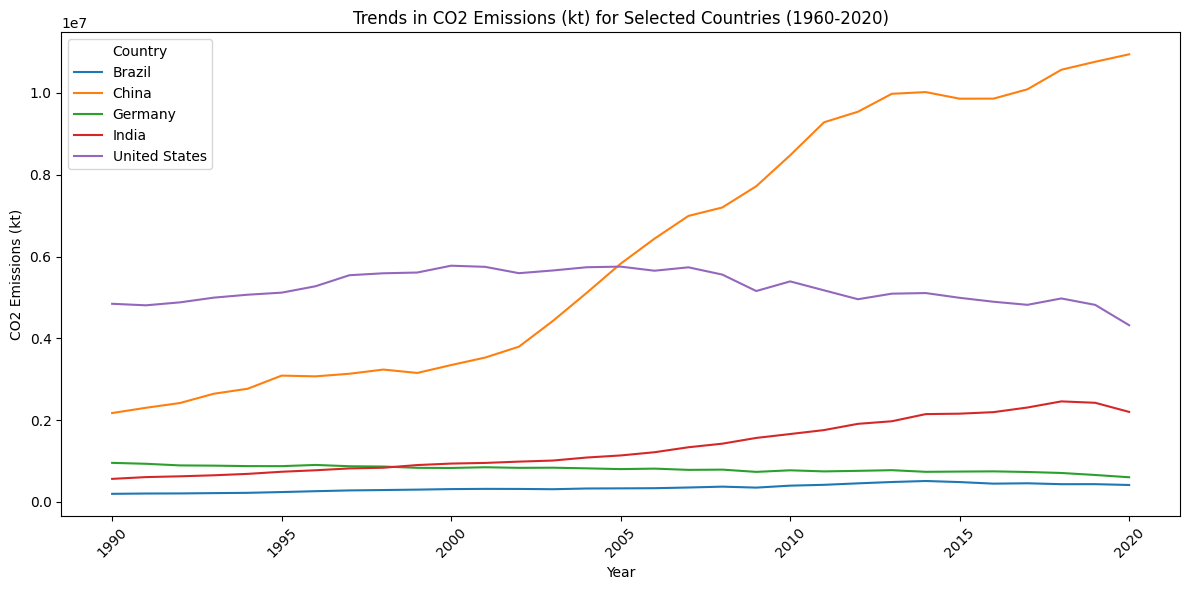

In [23]:
# Redefining the path to the data file
data_path = '/content/World CO2 Emission Data.csv'

# Reloading the data
co2_data = pd.read_csv(data_path)

# Attempting basic filtering for a visualization as previously done
co2_emissions = co2_data[co2_data['Series Name'] == 'CO2 emissions (kt)']
selected_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
co2_emissions = co2_emissions[co2_emissions['Country Name'].isin(selected_countries)]

# Reshaping data for visualization
years = [col for col in co2_emissions.columns if 'YR' in col]
co2_emissions_melted = co2_emissions.melt(id_vars=['Country Name'], value_vars=years,
                                          var_name='Year', value_name='CO2 Emissions (kt)')

# Cleaning data for visualization
co2_emissions_melted['Year'] = co2_emissions_melted['Year'].str.extract('(\d{4})').astype(int)
co2_emissions_melted['CO2 Emissions (kt)'] = pd.to_numeric(co2_emissions_melted['CO2 Emissions (kt)'], errors='coerce')

# Plotting the data again
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=co2_emissions_melted, x='Year', y='CO2 Emissions (kt)', hue='Country Name')
plt.title('Trends in CO2 Emissions (kt) for Selected Countries (1960-2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()




---



## Submitting Your Work

Submit your work as usual.